# 线性回归
线性回归原理+代码（分别使用sklearn的包，正规方程和梯度下降来实现线性回归预测波士顿房价）

定义：利用称为线性回归方程的最小平方函數对一个或多个自变量和因变量之间关系进行建模的一种回归分析。<br>
公式：$y = \theta_0 + \theta_1x_1 + \cdots  + \theta_px_p + \epsilon  = \theta^Tx + \epsilon$, 只有一个自变量就是$y = wx+b$，$\epsilon$和$b$符合正态分布。 <br>
训练：通过最小化**平方差形式的损失函数Mean Square Error**来求取参数值
$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2, \qquad  \\ 或 \\ 矩阵表示: J(\theta) = \frac{1}{2m} (X\theta-y)^T(X\theta - y)$$

怎么通过最小化MSE来求参数$\theta$？用正规方程或梯度下降。<br>
### 正规方程：
令导数得0，直接通过矩阵运算求解$\theta$值
$$ \frac{\delta J(\theta)}{\delta \theta} = 2 X^T(X\theta - y)\\
\theta = (X^TX)^{-1}X^Ty$$
<br>注意：<br>
求解涉及到了矩阵的可逆问题，如果 $(X^TX)^{-1} $可逆，那么参数 $\theta$ 的解唯一。 **如果不可逆， 则此时就无法使用正规方程的方法来解。** 
### 梯度下降：
$$\theta_j = \theta_j - \alpha \frac{\delta}{\delta \theta_j} J(\theta) \\ 带入J(\theta) 得： \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (y^{(i)} - h_\theta(x^{(i)}))x_j^{(i)}  \\ 或矩阵表达：\theta_j = \theta_j + \alpha \frac{1}{m}(y-X\theta)^Tx_j$$
注意，这里$x_j^{(i)}$是第i条训练数据的第j个特征。

两种方法比较：
- 特殊要求上：梯度下降中需要选择适当的学习率 $\alpha $，正规方程中矩阵需要可逆。
- 梯度下降法中需要多次进行迭代，而正规方程只需要使用矩阵运算就可以完成
- 梯度下降算法适合多特征， 而正规方程算法复杂度为 $O(n^3) $，所以如果特征维度太高（特别是超过 10000 维），那么不宜用方程求解。

## 如何评估线性回归模型
### 1. 均方误差MSE（Mean Squared Error）
简单思想，把误差平方和SSE消除样本个数的影响就是MSE。<br>
$$MSE=\frac{1}{m}\sum^m_{i=1}(y^{(i)}-h_\theta(x^{(i)})^2$$

### 2. 均方根误差RMSE（Root Mean Squarde Error）
但是使用均方误差MSE收到量纲的影响。例如在衡量房产时，y的单位是（万元），那么衡量标准得到的结果是（万元平方）。为了解决量纲的问题，可以将其开方。<br>
$$RMSE=\sqrt{MSE}=\sqrt{\frac{1}{m}\sum^m_{i=1}(y^{(i)}-h_\theta(x^{(i)})^2}$$

### 3. 平均绝对误差MAE（Mean Absolute Error）
另外一种非常朴素评测标准：要求真实值与预测结果之间的距离最小，可以直接相减做绝对值，加m次再除以m。绝对值函数不是处处可导的，损失函数不能用，但是在评价模型时不影响。<br>
$$MAE=\frac{1}{m}\sum^m_{i=1}|y^{(i)}-h_\theta(x^{(i)}|$$

### 4: R方（R Square）
R方好在它是在0到1之间的一个数。而以上三种都没有这个性质，也就是如果两个量纲不同的模型（预测身高和预测房价），用这三种是不好比较的。
$$R^2=1-\frac{SSE}{SS_{yy}}=1-\frac{\sum^m_{i=1}(y^{(i)}-h_\theta(x^{(i)})^2}{\sum^m_{i=1}(y^{(i)}-\bar y^{(i)})^2}$$
后面这一坨的分子来是预测值和真实值之差的平方和，即模型预测产生的错误，分母是均值和真实值之差的平方和，即认为“预测值=样本均值”这个模型（Baseline Model）所产生的错误。因此用1减去较少的错误除以较多的错误，实际上是衡量了我们的模型拟合住数据的地方，即没有产生错误的相应指标。当R方=0时我们的模型和基准模型一样，越接近1越好（1是不犯任何错误），小于0时说明我们的模型还不如基准模型，可能不适用线性回归

### 提问：为什么线性回归使用平方差形式的损失函数？<br>
回答：因为**最小二乘法思想**与**极大似然估计**的思想在本质上是相同的。不是我们特意去选择mse作为线性回归的损失函数,而是因为我们假设误差服从正态分布，使用极大似然法（最大化误差项目为$\varepsilon_i$的样本总体出现的概率最大）来求解参数，进一步经过推导之后得到的mse的公式而已，具体流程见下：<br>
$\quad$ 假设误差为$\varepsilon_i=y_i-\hat y_i$<br>
$\quad$ 我们通常认为$\varepsilon$服从正态分布$f(\varepsilon_i;\mu,\sigma^2)=\frac{1}{\sigma \sqrt{2\pi}}\exp[-\frac{(\varepsilon_i-\mu)^2}{2\sigma^2}]$，即在某个$(\mu, \sigma^2)$下，$\varepsilon$取得现有样本$\varepsilon_i$的概率最大。那么我们实际原始目标是使得这个正态分布表达式的连乘的极大似然估计最大，根据极大似然估计函数的定义：
$$L(\mu, \sigma^2)=\prod^n_{i=1}\frac{1}{\sigma \sqrt{2\pi}}\exp[-\frac{(\varepsilon_i-\mu)^2}{2\sigma^2}]\\
\log L(\mu, \sigma^2)=-\frac{n}{2}\log \sigma^2 - \frac{n}{2}\log 2\pi - \frac{\sum_{i=1}^n(\varepsilon_i-\mu)^2}{2\sigma^2}$$
令$(\mu,\sigma^2)$的偏导=0得到：
$$\mu = \frac{1}{n}\sum^n_{i=1}\varepsilon_i\\
\sigma^2=\frac{1}{n}(\varepsilon_i-\mu)^2$$
我们求线性回归的最佳拟合直线或平面实际上是求误差最小时的参数值，也就是让误差$\varepsilon$的均值$\mu$和方差$\sigma$越趋近于0越好，即：
$$\mu = \frac{1}{n}\sum^n_{i=1}\varepsilon_i=\frac{1}{n}\sum^n_{i=1}(y_i-\hat y_i)\\
\sigma^2=\frac{1}{n}(\varepsilon_i-\mu)^2=\frac{1}{n}(y_i-\hat y_i-\mu)^2\approx \frac{1}{n}(y_i-\hat y_i)^2$$
可以看到这与前面的MSE是等价的。

# 岭回归Rigid Regression
定义：本质上是线性回归+L2正则化

公式：$\hat{h}_{\theta}(x) = h_{\theta}(x) + \lambda \sum_i w_i^2$

# Lasso回归
定义：本质上是线性回归+L1正则化

公式：$\hat{h}_{\theta}(x) = h_{\theta}(x) + \lambda \sum_i |w_i|$
# ElasticNet回归
定义：本质上是线性回归+L1正则化+L2正则化

公式：$\hat{h}_{\theta}(x) = h_{\theta}(x) + \lambda \sum_i |w_i| + \lambda \sum_i w_i^2$
# 局部加权线性回归
在线性回归中， 由于最终拟合出来的曲线是一条直线，其拟合能力极为有限（也可以解释为线性回归所求的是具有最小均方误差的无偏估计），因此很容易造成欠拟合现象， 而针对这个问题，有人提出了局部线性回归(LWR)。

局部加权回归其思想很简单： 我们对一个输入 w 进行预测时，赋予了 x 周围点不同的权值，距离 x 越近，权重越高。整个学习过程中误差将会取决于 x 周围的误差，而不是整体的误差，这也就是局部一词的由来。

在LWR中， 其损失函数为：
$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m w^{(i)} (h_\theta(x^{(i)}) - y^{(i)})^2 \\ 矩阵表示: J(\theta) = \frac{1}{2m} (X\theta-y)^TW(X\theta - y)$$
此时，使用回归方程求得：
$$\theta = (X^TWX)^{-1}X^TWy$$
而通常， $w^{(i)} $ 服从高斯分布， 在x周围指数型衰减;
$$w^{(i)} = e^{- \frac{|x^{(i)} - x|}{2 k^2 }}$$
其中， **k 值越小，则靠近预测点的权重越大，而远离预测点的权重越小**。所以参数k的值决定了权重的大小。 

> - k越大权重的差距就越小，k越小权重的差距就很大，仅有局部的点参与进回归系数的求取，其他距离较远的权重都趋近于零。
> - 如果k去进入无穷大，所有的权重都趋近于1，W也就近似等于单位矩阵，局部加权线性回归变成标准的无偏差线性回归，会造成欠拟合的现象；
> - 当k很小的时候，距离较远的样本点无法参与回归参数的求取，会造成过拟合的现象。
***

In [97]:
# 线性回归预测波士顿房价
# 准备数据
import pandas as pd
import numpy as np
data = pd.read_csv(r'Boston.csv')
y_data = data['MEDV'].values
x_data = data.drop('MEDV',axis=1).values

# 对x值进行归一化（房价的不同特征数值差异较大）
from sklearn import preprocessing as spp
scaler = spp.MinMaxScaler()
x_pre_data = scaler.fit_transform(x_data)

# 划分训练数据集和预测数据集
def divide(xdata, ydata, percent):
    sign_list = list(range(len(xdata)))
    # 用于测试的序号(replace=False即不再放回)和对应的测试集
    select_sign = sorted(np.random.choice(sign_list,int(len(x_data)*percent),replace=False))
    x_predict_data = xdata[select_sign]
    y_predict_data = ydata[select_sign]
    # 用于训练的序号和对应训练集
    no_select_sign = [_ for _ in sign_list if _ not in select_sign]
    x_train_data = xdata[no_select_sign]
    y_train_data = ydata[no_select_sign]
    return x_train_data, y_train_data, x_predict_data, y_predict_data

x_train_data, y_train_data, x_predict_data, y_predict_data = divide(x_pre_data, y_data, 0.1)

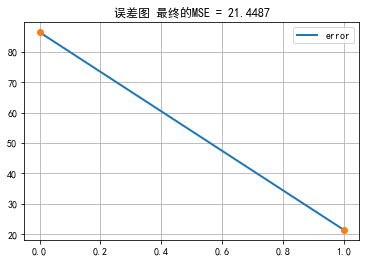

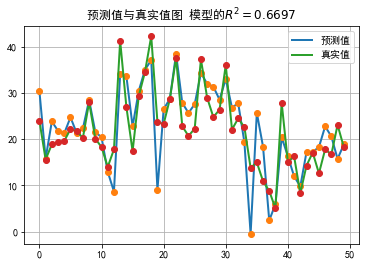

线性回归的系数为:
 w = [ -9.0098876    4.42443441   0.7389227    2.96151454  -9.01272441
  20.12690253   1.62147295 -14.71606306   7.11800402  -6.13845281
  -9.10303632   3.50634524 -21.3286142 ] 
 b = 25.969616677981556


In [98]:
# 使用sklearn的包来做线性回归
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体
mpl.rcParams['axes.unicode_minus'] = False # 这种字体没有basic unicode signs，负数没法正常显示，所以调整一下
def figure(title, *datalist):
    for jj in datalist:
        plt.plot(jj[0], '-', label=jj[1], linewidth=2)
        plt.plot(jj[0], 'o')
    plt.grid()
    plt.title(title)
    plt.legend()
    plt.show()
reg = linear_model.LinearRegression()
#  最终的程序
if __name__ == "__main__":

    # 开始训练
    reg.fit(x_train_data, y_train_data)

    # 预测数据的预测值
    predict_result = reg.predict(x_predict_data)

    # 训练数据的预测值
    train_pre_result = reg.predict(x_train_data)
    
    train_error = [mean_squared_error(y_train_data, [np.mean(y_train_data)] * len(y_train_data)),
                   mean_squared_error(y_train_data, train_pre_result)]

    # 绘制误差图
    figure('误差图 最终的MSE = %.4f' % (train_error[-1]), [train_error, 'error'])

    # 绘制预测值与真实值图
    figure('预测值与真实值图 模型的' + r'$R^2=%.4f$' % (r2_score(train_pre_result, y_train_data)), [predict_result, '预测值'],
           [y_predict_data, '真实值'])
    plt.show()

    # 线性回归的参数
    print('线性回归的系数为:\n w = %s \n b = %s' % (reg.coef_, reg.intercept_))

In [131]:
# 用正规方程解theta = (X^T*X)^-1*X^T*y
from numpy import matrix,linalg
def normal_equ(x,y):
    m = len(y)
    X = np.hstack((np.ones((m,1)),x))
    
    # X 是 m * (n+1) 矩阵, m 个样本，n个特征, 1列1
    X = matrix(X)

    # y 是 m * 1 向量
    y = matrix(y).transpose()
    
    XTX = (X.transpose() * X)
    if linalg.det(XTX) == 0.0:
        print('矩阵无法求逆！')
        return
    # theta 是 (n+1) * 1 向量
    theta = XTX.I * X.transpose() * y
    return theta

theta = normal_equ(x_train_data, y_train_data)
print(theta)
# 值和上面基本一样，就不再绘图了。

[[ 25.96961668]
 [ -9.0098876 ]
 [  4.42443441]
 [  0.7389227 ]
 [  2.96151454]
 [ -9.01272441]
 [ 20.12690253]
 [  1.62147295]
 [-14.71606306]
 [  7.11800402]
 [ -6.13845281]
 [ -9.10303632]
 [  3.50634524]
 [-21.3286142 ]]


[[ 22.36696587]
 [ -7.30822971]
 [  3.9344304 ]
 [  0.91332039]
 [  2.96146274]
 [ -7.739986  ]
 [ 22.68061172]
 [  1.70051067]
 [-12.44712489]
 [  6.37050948]
 [ -5.64894593]
 [ -8.57401617]
 [  4.15372865]
 [-20.39866338]]


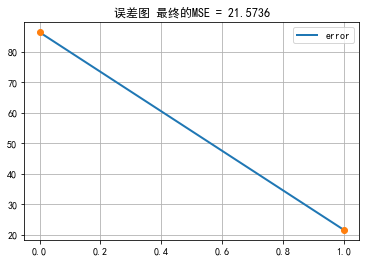

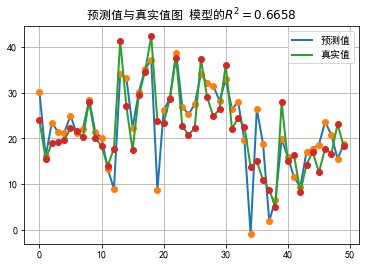

In [164]:
# 用梯度下降解
def MSE(x, y, theta):
    # 实际是用来绘图的
    inner = np.power(((x * theta) - y), 2)
    return np.sum(inner) / (2 * len(x))

def gradient_descent(x, y, alpha, iters):
    m = len(y)
    n = x.shape[1]
    X = np.hstack((np.ones((m,1)),x))
    
    # X 是 m * (n+1) 矩阵, m 个样本，n个特征, 1列1
    X = matrix(X)

    # y 是 m * 1 向量
    y = matrix(y).transpose()
    
    # theta 是 (n+1) * 1 向量
    theta = np.matrix(np.zeros((n+1, 1)))
    cost = np.zeros(iters)
    
    for i in range(iters):
        err = (X*theta)-y
        for j in range(n+1):
            term = np.multiply(err, X[:,j])
            theta[j,0] = theta[j,0] - ((alpha / len(X)) * np.sum(term))
        
        cost[i] = MSE(X, y, theta)

    return theta, cost
    
theta, cost = gradient_descent(x_train_data, y_train_data, 0.04, 9000)
print(theta)
predict_result = np.matrix(np.hstack((np.ones((len(x_predict_data),1)),x_predict_data)))*theta
train_pre_result = np.matrix(np.hstack((np.ones((len(x_train_data),1)),x_train_data)))*theta
train_error = [mean_squared_error(y_train_data, [np.mean(y_train_data)] * len(y_train_data)),
                   mean_squared_error(y_train_data, train_pre_result)]

    # 绘制误差图
figure('误差图 最终的MSE = %.4f' % (train_error[-1]), [train_error, 'error'])

    # 绘制预测值与真实值图
figure('预测值与真实值图 模型的' + r'$R^2=%.4f$' % (r2_score(train_pre_result, y_train_data)), [predict_result, '预测值'],
           [y_predict_data, '真实值'])
plt.show()